# Conduccion de calor 

##### Claudio Santiago Perez Ruiz

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def conduccion(k, S, L, Ta, Tb, N):
    
    
    
    """
    Parametros
    
    
    L: float
    L es la longitud del dominio
    
    S: float
    Es la fuente.
    
    k: float
    Es la conductividad del material.
    
    Ta: float
    Es la condición de frontera izquierda.
    
    Tb: float
    Es la condición de frontera derecha.

    N: int
    Es el número de nodos internos (grados de libertad).
    
    Return
    
    """
    h = L / (N + 1)

    #almacén de datos:
    T = np.zeros(N + 2)
    b = np.zeros(N)
    A = np.zeros((N,N))

    r = k / h**2
    b[:] = S / r #Posición específica

    T[0] = Ta
    T[-1] = Tb

    b[0] += Ta
    b[-1] += Tb

    #matriz:
    A[0,0] = 2
    A[0,1] = -1
    for i in range(1,N-1):
        A[i,i] = 2 #Diagonal
        A[i,i+1]= -1 #Diagonal superior
        A[i,i-1]= -1 #Diagonal inferior
    A[-1,-2] = -1
    A[-1,-1] = 2

    
    T[1:N+1] = np.linalg.solve(A,b) #Sistema de ecuaciones

    plt.plot(T, 'o-', color = 'cornflowerblue') #Gráfica de nodos
    plt.show()

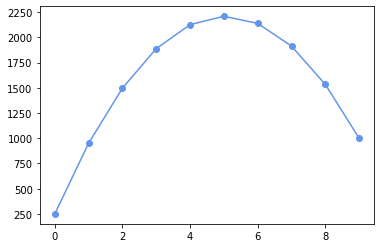

In [10]:
conduccion(0.02,10.0,5.0,250,1000,8) #Implementación de documentación


In [15]:
import ipywidgets as widgets

In [19]:
#Ejercicio interactivo

w = widgets.interactive(conduccion,
                       k = widgets.fixed(0.02),
                       S = widgets.FloatSlider(max=1., min=0.0, value=0, step=0.2),
                       L = widgets.fixed(5.0),
                       Ta = widgets.fixed(200),
                       Tb = widgets.fixed(1000),
                       N = widgets.IntSlider(max = 20, min=3, value=4))

In [20]:
display(w)

interactive(children=(FloatSlider(value=0.0, description='S', max=1.0, step=0.2), IntSlider(value=4, descripti…